# EEG Data Analysis

## Introduction


BURADA TEZDE NE YAPTIGINIZI GENEL HATLARI ILE ANLATIN.


## Data

The data we use in this study comes from Electroencephalography (EEG) signals collected from 35 subjects at rest (1) and during performing a simple arithmetic task (2). The subjects and the condition under which the data is recorded is encoded in filenames. The electrode positions were located at standard sites (Standard Electrode Position Nomenclature, American Electroencephalographic Association 1990).  In each trial for each subject a 64 channel EEG signal (sampled at 256 Hz, i.e., 256 samples/second) is recorded.


## Importing Libraries

First, we need to load all the helper libraries to be used in code. These are

1. **numpy**: Numpy is a library that facilitates mathematical operations on large arrays and arrays.

2. **pandas**: Pandas is used to process, analyze and manipulate data.

3. **mne**: This is a python package that allows working with EEG and MEG data. It allows us to read EEG data.

4. **glob**: The recorded signals consist of 70 files with `.edf` extension. The glob module in python was used to be able to read these files. Glob module helps to list specific files in folder.

5. **os**: The module provides support for using files and folders between operating systems.

6. **matplotlib.pyplot**: The module contains the utilty functions to visualize data.

In [2]:
from glob import glob
import os # linux veya windows dizinleri için
import mne # Open;-source Python package for exploring, visualizing, and analyzing human neurophysiological data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

First, we import the files in the data folder into our working environment with the glob module mentioned above. Test was done with the first index(0) to see the file names.

In [4]:
all_file_path=glob('Data/*.edf') # list şeklinde
all_file_path[0]

IndexError: list index out of range

As mentioned earlier, each subject has two data sets recorded in separate files: one at rest and the other during arithmetic tasks. This is encoded in the file name. Files whose names containing a `1` contain data from subjects taken at rest, while files whose names containing a `2` contain data taken during arithmetic tasks. The len() function is applied to see the lengths of the lists. The length of lists are same.

In [3]:
before_test=[i for i in all_file_path if '1' in i.split('_')[1]]
during_test=[i for i in all_file_path if '2' in i.split('_')[1]]
print(len(before_test),len(during_test))

36 36


##  Sample Data

The data is recorded in [European Data Format (EDF)](https://en.wikipedia.org/wiki/European_Data_Format) format. In order to examine the data we needed to ingest the data using `mne` library. Specifically, we used `io.read_raw_edf` function in the `mne`. In order to load the data faster, the memory was preloaded with the `preload` parameter.


**ASAGIDAKI KODU DEGISTIRDIM. BIR BAKIN.***

In [4]:
from random import randint

m = randint(0,36)
data1=mne.io.read_raw_edf(before_test[m],preload=True)
data2=mne.io.read_raw_edf(during_test[m],preload=True)

print(len(data1),len(data2))

Extracting EDF parameters from C:\Users\Alperen Usta\Bitirme\Data\Subject04_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 84999  =      0.000 ...   169.998 secs...
Extracting EDF parameters from C:\Users\Alperen Usta\Bitirme\Data\Subject04_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


We checked length of both data sets (data recorded at rest and data recorded during the arithmetic tasks) by using the `len` function for a random subject. As can be seen, the data set taken at rest is larger. When we repeated the same procedure for different subjects we observed that data recored at rest and data recorded during arithmetic tasks are not necessarily of the same length.

Below, the general information about the data is displayed for a random subject. This information includes upper and lower frequency limits, number of channels, filename and processing time. It has been determined that the high pass and low pass values vary for different subjects.

In [6]:
data1

<RawEDF | Subject04_1.edf, 21 x 85000 (170.0 s), ~13.6 MB, data loaded>

In [7]:
data2

<RawEDF | Subject04_2.edf, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>

We now plot the data for this random subject as a multivariate time series.

Using matplotlib as 2D backend.
Opening raw-browser...


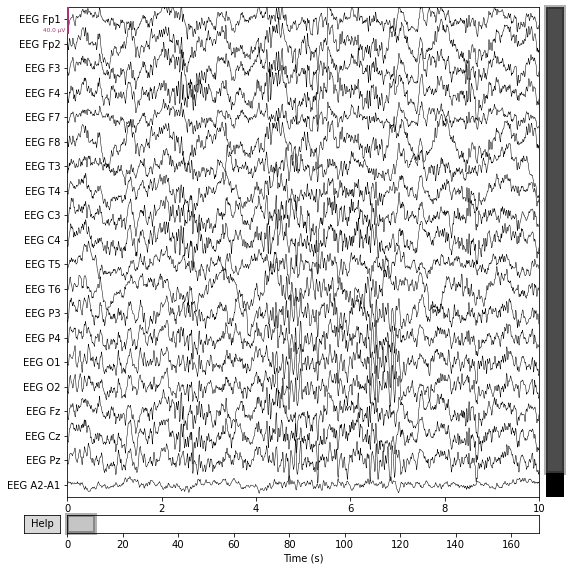

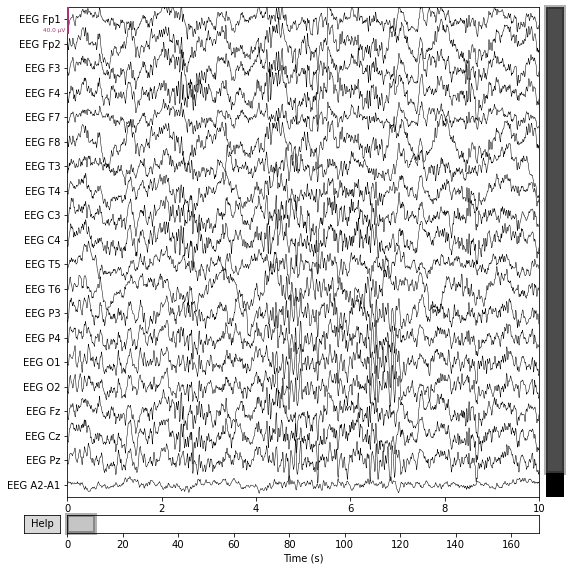

In [8]:
data1.plot()

Opening raw-browser...


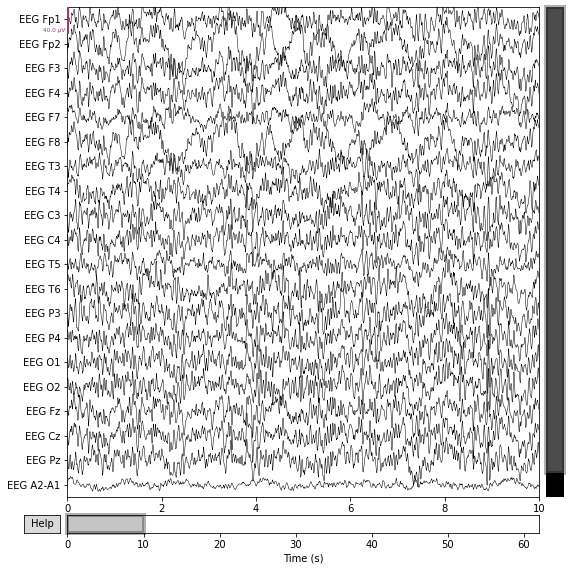

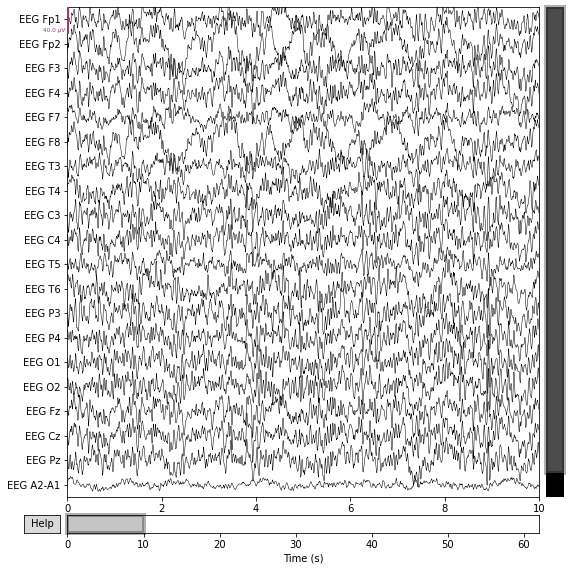

In [9]:
data2.plot()

**BURAYA KADAR GELDIM**


## read_data function
 
After examining the sample person's data, the read_data function was created to read all people's data in a single function. The details of this function are as follows;
 
 1-) **mne.io.read_raw_edf**:For reading files process, io.read_raw_edf() function in the mne library is used.
 
 2-) **data.filter**: This function determines the maximum and minimum frequency values in the data of individuals and brings the frequencies within this range.
 
 3-) **mne.make_fixed_length_epochs**: In the function, the data is split into 5 second chunks and the length of overlap between chunks is 1 second.
  
 4-) **epochs.get_data()**: This function converts data to array format.
 
 

In [11]:
def read_data(file_path):
    data=mne.io.read_raw_edf(file_path,preload=True)
    data.filter(l_freq=0,h_freq=45)
    epochs=mne.make_fixed_length_epochs(data,duration=5,overlap=1) # Divide continuous raw data into equal-sized consecutive epochs.
    array=epochs.get_data() # to_array..in some cases the to_data_frame function can be used
    return array
    
    

In [12]:
sample_data1=read_data(before_test[4])
sample_data2=read_data(during_test[4])


Extracting EDF parameters from C:\Users\Alperen Usta\Bitirme\Data\Subject04_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 84999  =      0.000 ...   169.998 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 147 samples (0.294 sec)

Not setting metadata
42 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 42 events and 2500 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Alperen Usta\Bitirme\Data\Subject04_2.edf...
EDF file detected
Setting chann

In [13]:
print(sample_data1.shape,sample_data2.shape) # no of epochs, channels, length of signal

(42, 21, 2500) (15, 21, 2500)


As a result of the function created above, the data of a person was examined. Before_test_array and during_test_array lists are created and added to all people with the help of comprehension.

In [14]:
%%capture 
# to not show warnings.
before_epochs_list=[read_data(i) for i in before_test] 
during_epochs_list=[read_data(i) for i in during_test]

In [15]:
print(len(before_epochs_list),len(during_epochs_list)) 

36 36


## Labeling

Tagging is done for each person in the before_epoch_array and during_epoch_array lists. The number 0 is used for people's data in before_epoch_array and 1 is used for people's data in during_epoch_array.

In [16]:
before_epochs_labels=[len(i)*[0] for i in before_epochs_list]
during_epochs_labels=[len(i)*[1] for i in during_epochs_list]
len(before_epochs_labels),len(during_epochs_labels) 

(36, 36)

In [17]:
len(before_epochs_labels[0]),len(during_epochs_labels[0]) ## determines whether each patient is 0 or 1 based on the number of epochs

(45, 15)

In [19]:
data_list= before_epochs_list + during_epochs_list # adding arrays end to end
label_list= before_epochs_labels + during_epochs_labels # adding arrays end to end

In [23]:
len(data_list),len(label_list),data_list[0].shape,len(label_list[0]) ## checking the length of arrays.

(72, 72, (45, 21, 2500), 45)

In [24]:
type(data_list), type(data_list[0])

(list, numpy.ndarray)

## Group Label

Their data was numbered according to the number of people. Since each person has 2 separate data, there are numbers from 0 to 71.

In [25]:
group_list=[[i]*len(j) for i,j in enumerate(data_list)] # her gruptaki insanın grup numarasını işaretliyoruz
len(group_list)

72

The initial size of the created arrays was divided into 45 epochs in general before the arithmetic operation, while it was divided into 15 epochs after the arithmetic operation. However, since the length of some data varies, it was determined with the code below that the epoch number of some data was different before the arithmetic operation.

In [26]:
for i in range(71):
    print(len(data_list[i])) 

45
45
45
45
42
45
45
45
45
45
46
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
19
45
45
45
45
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15


**With the vstack function, each array is added one after the other in the data_list array. If the epoch numbers were not different, the initial dimension length would be 2160. The reason for the difference was identified in the previous line of code. The label_list and gorup_list arrays are combined horizontally with the hstack function. The shape of the new arrays formed can be seen from the code below.**



In [27]:
data_array=np.vstack(data_list) # (vertical) 
label_array=np.hstack(label_list) # (horizontal)
# group_array=np.hstack(group_list) # (horizontal)
print(data_array.shape, label_array.shape)


(2132, 21, 2500) (2132,)


***After these operations were done, 3 arrays were created. While the array named data_array is 3 dimensional, other arrays are one dimensional. When estimating, the label_array for the dependent variable needs to be added to the data_array.***

***To add the label_array to the data_array, the arrays had to be equal in size. So the initial size of label_array is set relative to data_array. Since the second dimension of data_array has 21 columns, the label array also had to be arranged this way.***

***np.tile function was used for this operation. Thanks to this function, the array is made into a new array with the given repeat parameter. With the concatenate function, label_array has been added to the group array.***

group_array = np.tile(group_array.reshape(2132, 1, 1), (1, 21, 1)) ## bu kod satırını overfite yol açtığı için kaldırdık

C = np.concatenate((C,group_array ), axis = 2)

***To set up the Logistic Regression model, the column labeling the before and after arithmetic operation was taken as an dependent variable. (resting situation and arithmetic test situation)***

In [28]:
y=label_array
y.shape

(2132,)

In [29]:
from collections import Counter
Counter(y)

Counter({0: 1592, 1: 540})

***All data except the label column is assigned to the variable x as independent variable.***

In [30]:
x=data_array
x.shape


(2132, 21, 2500)

In [31]:
x

array([[[-3.64793763e-06, -4.44512865e-06, -5.19863805e-06, ...,
         -1.45213169e-05, -1.46876459e-05, -1.48666633e-05],
        [-3.58186632e-06, -4.40797570e-06, -5.13066855e-06, ...,
         -2.18158585e-05, -2.18827831e-05, -2.20884007e-05],
        [-4.08124663e-06, -5.15782598e-06, -6.28031596e-06, ...,
         -1.40360135e-05, -1.44789021e-05, -1.47045692e-05],
        ...,
        [ 2.82213640e-06,  6.12516731e-06,  9.25938963e-06, ...,
         -2.25688536e-06, -1.15111930e-06, -9.56771340e-08],
        [ 1.29154198e-06,  7.47889399e-07,  2.79787545e-07, ...,
         -5.86031685e-06, -5.62827986e-06, -5.32819995e-06],
        [ 5.41307623e-06,  7.73980090e-07, -4.38729820e-06, ...,
         -2.08746930e-05, -1.07144917e-05, -1.29964180e-06]],

       [[ 2.72022251e-06,  2.50323336e-06,  2.68312002e-06, ...,
         -5.16857456e-06, -3.52288409e-06, -1.76227423e-06],
        [-2.42967314e-06, -2.09487195e-06, -1.11505885e-06, ...,
         -9.12055562e-06, -7.06415215e

***In order to train the model and measure its accuracy, the data was divided into two parts as train and test. The size of the test data is set to 20%. The random_state parameter is set to none so that it shuffles the data each time the model runs.***

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = None)

In [33]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1705, 21, 2500), (427, 21, 2500), (1705,), (427,))

In [34]:
type(label_array)

numpy.ndarray

In [35]:
type(label_array.ravel())

numpy.ndarray

In [36]:
a,b,c=X_train.shape
d,e,f=X_test.shape

In [37]:
X_train_shape=X_train.reshape(a,b*c) # 
X_test_shape=X_test.reshape(d,e*f)

The ravel function is used to convert a contiguous flattened array to one dimension.

In [38]:
y_train_shape=y_train
y_test_shape=y_test

In [39]:
X_train_shape.shape,X_test_shape.shape

((1705, 52500), (427, 52500))

In [40]:
y_train.shape,y_test.shape

((1705,), (427,))

In [41]:
X_train

array([[[-2.03214345e-07, -1.78127189e-07, -1.48380690e-08, ...,
          3.16121664e-06,  2.36760019e-06,  1.63838389e-06],
        [-1.77521325e-06, -2.18452688e-06, -2.61626913e-06, ...,
         -8.70926895e-06, -9.70326608e-06, -9.96358797e-06],
        [-5.80383532e-06, -5.34970662e-06, -4.93098170e-06, ...,
         -3.59355539e-06, -5.32634939e-06, -6.93087999e-06],
        ...,
        [-1.26901294e-05, -1.27487839e-05, -1.30513989e-05, ...,
          1.05803823e-05,  1.07939746e-05,  1.06969750e-05],
        [-2.85722415e-06, -3.19495651e-06, -3.60505300e-06, ...,
         -1.59935678e-06, -1.83749535e-06, -1.50453949e-06],
        [ 2.16128095e-05,  2.49591284e-05,  2.80782741e-05, ...,
         -2.33544327e-05, -2.75744849e-05, -2.90189008e-05]],

       [[-1.02391356e-05, -1.21305256e-05, -1.34456118e-05, ...,
          3.08840495e-07,  3.12526757e-07,  3.13211123e-07],
        [-4.19475731e-06, -7.59722800e-06, -1.04113558e-05, ...,
         -1.97754985e-06, -2.00127534e

In [42]:
logisticRegr = LogisticRegression(solver = 'liblinear')
logisticRegr.fit(X_train_shape,y_train)
y_pred=logisticRegr.predict(X_test_shape)
logisticRegr.score(X_test_shape, y_test)



0.7353629976580797

In [43]:
from sklearn.metrics import confusion_matrix
y_pred = logisticRegr.predict(X_test_shape)
confusion_matrix(y_test,y_pred)

array([[314,   0],
       [113,   0]], dtype=int64)

In [45]:
from sklearn.svm import SVC

model = SVC(kernel='rbf',C=2.5)
model.fit(X_train_shape,y_train)
y_pred = model.predict(X_test_shape)
confusion_matrix(y_test,y_pred)


array([[303,  11],
       [ 99,  14]], dtype=int64)

In [46]:
model.score(X_test_shape,y_pred)


1.0